In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
df =pd.read_csv('/Users/lukeopany/Documents/food delivery time/Food_Delivery_Times.csv')

In [5]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [6]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [10]:
df.shape

(1000, 9)

In [11]:
df['Courier_Experience_yrs'].value_counts()

Courier_Experience_yrs
6.0    109
9.0    108
1.0    107
8.0    101
2.0     99
4.0     94
7.0     91
0.0     91
5.0     90
3.0     80
Name: count, dtype: int64

In [8]:
missing_mask = df.isnull().any(axis=1)

In [ ]:
df[missing_mask]

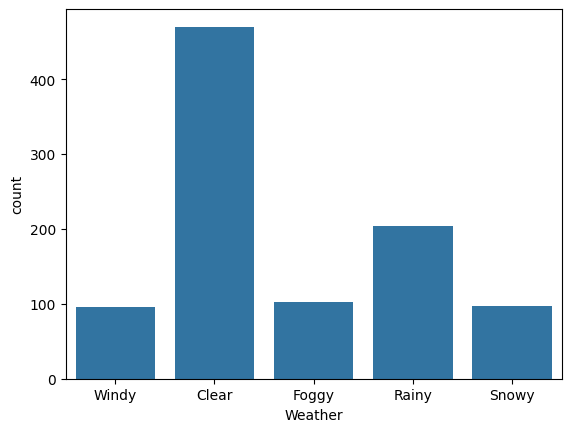

In [26]:
sns.countplot(x='Weather', data=df)
plt.show()

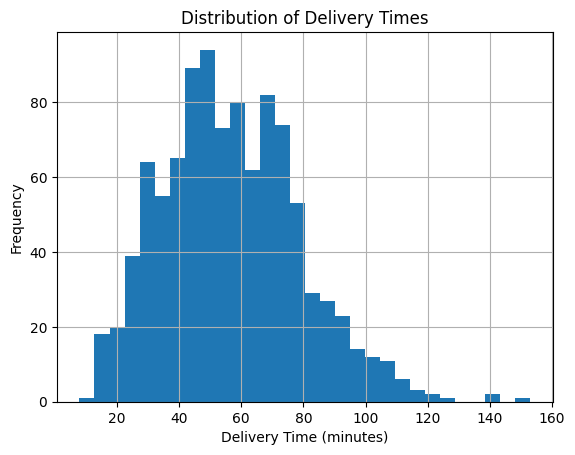

In [12]:
df['Delivery_Time_min'].hist(bins=30)
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Times')
plt.show()

Correlation between Delivery Time and Courier Experience: -0.090


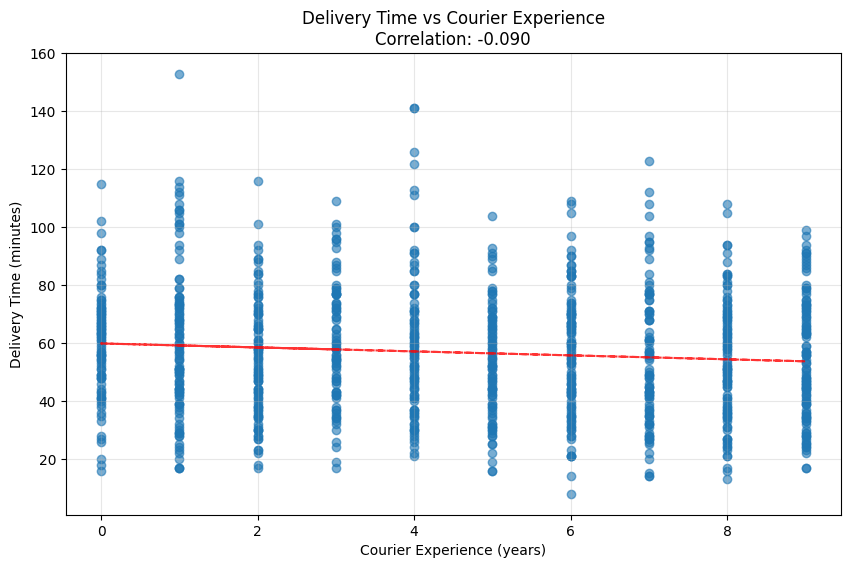

<Figure size 1200x600 with 0 Axes>

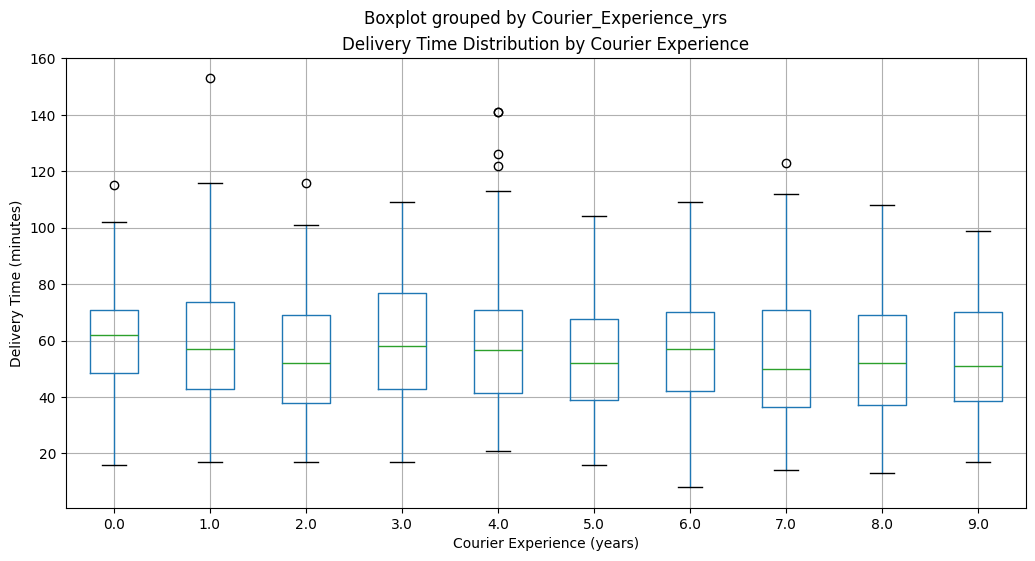

In [13]:
# Remove missing values for correlation analysis
clean_data = df[['Delivery_Time_min', 'Courier_Experience_yrs']].dropna()

# Calculate correlation coefficient
correlation = clean_data['Delivery_Time_min'].corr(clean_data['Courier_Experience_yrs'])
print(f"Correlation between Delivery Time and Courier Experience: {correlation:.3f}")

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(clean_data['Courier_Experience_yrs'], clean_data['Delivery_Time_min'], alpha=0.6)
plt.xlabel('Courier Experience (years)')
plt.ylabel('Delivery Time (minutes)')
plt.title(f'Delivery Time vs Courier Experience\nCorrelation: {correlation:.3f}')

# Add trend line
z = np.polyfit(clean_data['Courier_Experience_yrs'], clean_data['Delivery_Time_min'], 1)
p = np.poly1d(z)
plt.plot(clean_data['Courier_Experience_yrs'], p(clean_data['Courier_Experience_yrs']), "r--", alpha=0.8)

plt.grid(True, alpha=0.3)
plt.show()

# Group by experience levels for boxplot
plt.figure(figsize=(12, 6))
df.boxplot(column='Delivery_Time_min', by='Courier_Experience_yrs', figsize=(12, 6))
plt.title('Delivery Time Distribution by Courier Experience')
plt.xlabel('Courier Experience (years)')
plt.ylabel('Delivery Time (minutes)')
plt.show()

In [15]:
# This calculates a linear regression line
z = np.polyfit(clean_data['Courier_Experience_yrs'], clean_data['Delivery_Time_min'], 1)
p = np.poly1d(z)
# If z[0] (slope) is negative, line slopes downward

In [18]:
print("Time of Day categories:")
print(df['Time_of_Day'].value_counts())

Time of Day categories:
Time_of_Day
Morning      308
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

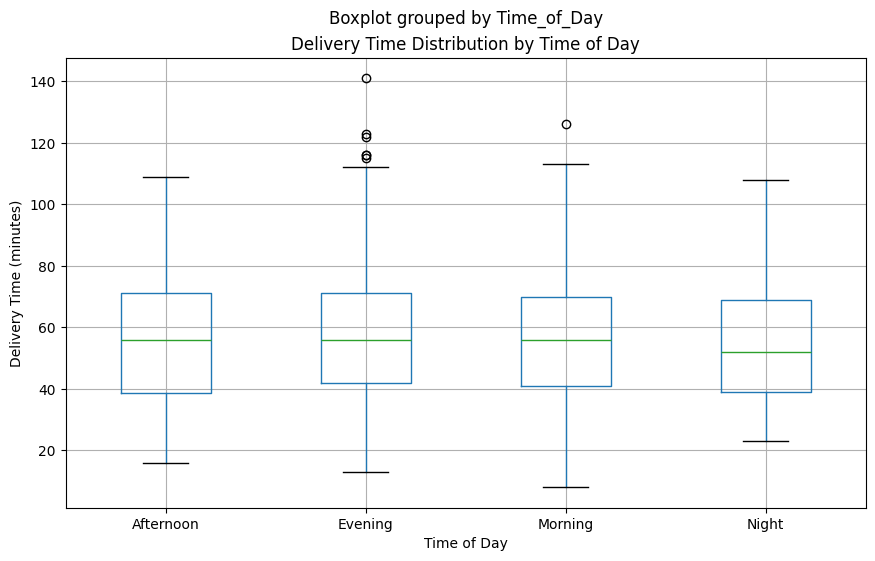

In [19]:
#boxplot to visualize delivery times across different times of day
plt.figure(figsize=(10, 6))
df.boxplot(column='Delivery_Time_min', by='Time_of_Day', figsize=(10, 6))
plt.title('Delivery Time Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Delivery Time (minutes)')
plt.show()

In [21]:
df['Weather'].value_counts()

Weather
Clear    470
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64

In [23]:
df['Weather'].value_counts(normalize=True) * 100


Weather
Clear    48.453608
Rainy    21.030928
Foggy    10.618557
Snowy    10.000000
Windy     9.896907
Name: proportion, dtype: float64

In [25]:
print(df['Distance_km'].corr(df['Delivery_Time_min']))

0.7809983586157749


In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [33]:
print("Data types in df:")
print(df.dtypes)

Data types in df:
Order_ID                    int64
Distance_km               float64
Weather                    object
Traffic_Level              object
Time_of_Day                object
Vehicle_Type               object
Preparation_Time_min        int64
Courier_Experience_yrs    float64
Delivery_Time_min           int64
dtype: object


In [34]:
print("\nColumns that will cause issues:")
print(df.select_dtypes(include=['object']).columns.tolist())


Columns that will cause issues:
['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']


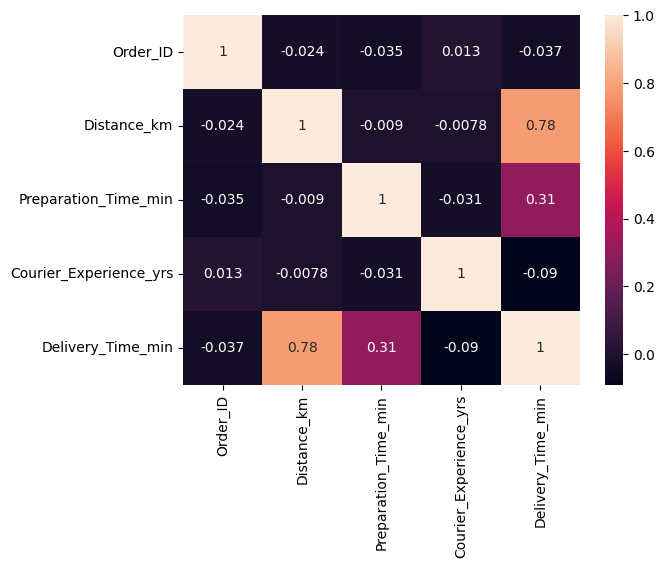

In [35]:
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
df_encoded = df.copy()

In [38]:
df_encoded

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [44]:
categorical_cols = df_encoded.select_dtypes(include=['object']).columns
print(f"Encoding columns: {categorical_cols}")

Encoding columns: Index(['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'], dtype='object')


In [49]:
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col]= df_encoded[col].fillna('unknown')
    df_encoded[col]=le.fit_transform(df_encoded[col])
    df_encoded = df_encoded.fillna(df_encoded.median(numeric_only=True))

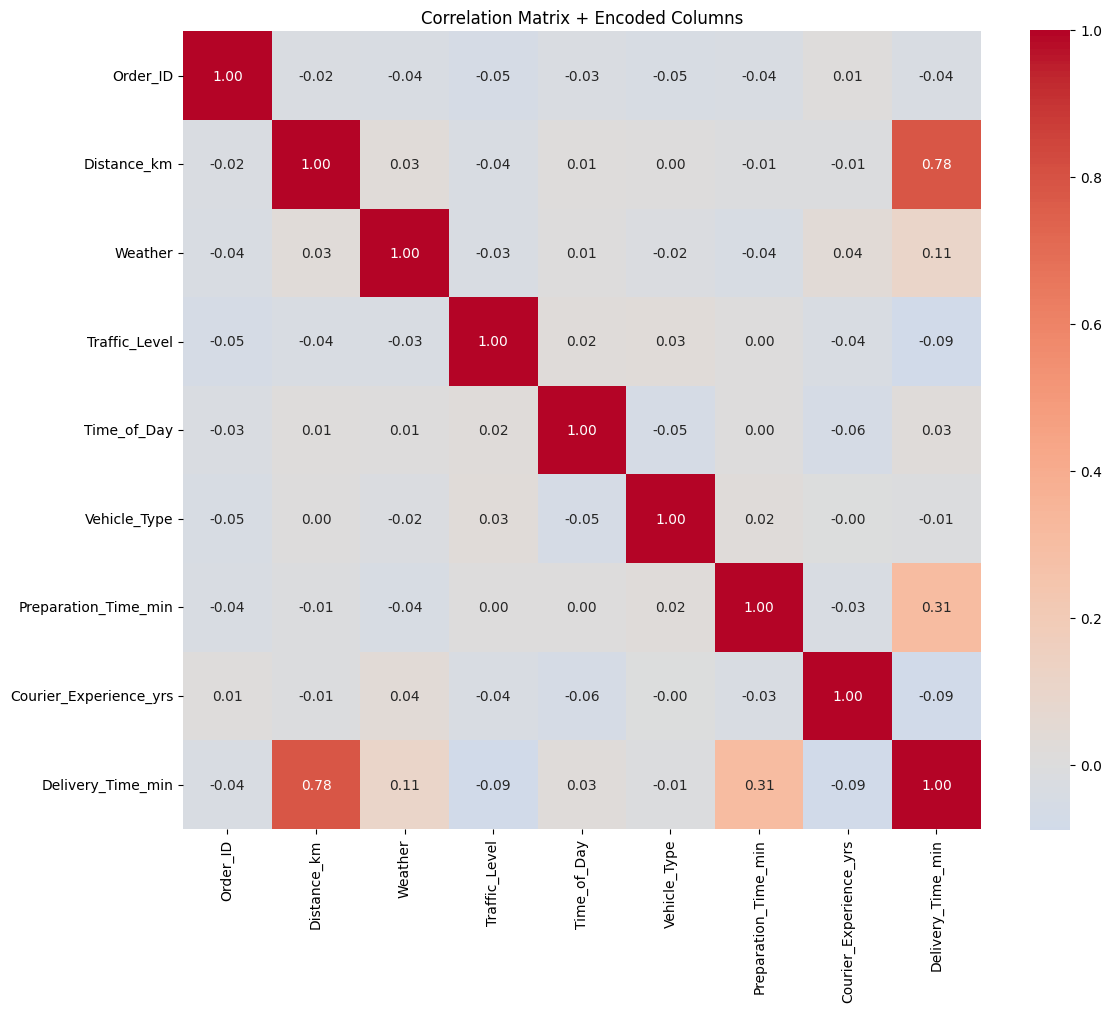

In [69]:
plt.figure(figsize=(12,10))
plt.title('Correlation Matrix + Encoded Columns')
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', center=0, square=True)
plt.tight_layout()
plt.show()


In [71]:
#Data Preprocessing 
#Here we are going to handle the missing values, encode categorical variables, and scale numerical features
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  1000 non-null   float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [ ]:
df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median(), inplace=True)

In [75]:
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)

In [77]:
from missing_data_helper import MissingDataHelper

In [78]:
helper = MissingDataHelper(df)

In [80]:
helper.interactive_analysis('Traffic_Level')


MISSING DATA ANALYSIS: Traffic_Level

📊 BASIC STATISTICS:
   Total Rows:        1,000
   Missing Values:    30 (3.0%)
   Present Values:    970

🔍 DATA CHARACTERISTICS:
   Data Type:         object
   Unique Values:     3
   Cardinality:       Low

📈 VALUE DISTRIBUTION (Top 5):
   'Medium': 390 (40.2%)
   'Low': 383 (39.5%)
   'High': 197 (20.3%)

   Mode: 'Medium' appears 390 times (40.21%)

💡 RECOMMENDATION

Strategy: Mode (acceptable) or 'Unknown'

✅ SAFE: Only 3.0% missing with clear mode.
   Mode 'Medium' appears in 40.21% of non-missing values.
   Recommendation: Mode is acceptable, but 'Unknown' is more transparent.

📝 SUGGESTED CODE:
----------------------------------------------------------------------
# Option 1: Mode (acceptable for low missingness)
df['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0], inplace=True)

# Option 2: 'Unknown' (more transparent)
df['Traffic_Level'].fillna('Unknown', inplace=True)
--------------------------------------------------------------

In [81]:
df['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0], inplace=True)

/var/folders/7l/9tv4v_3n66j8zq9dm5rg54rh0000gn/T/ipykernel_12337/2815799455.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0], inplace=True)


In [83]:
helper.interactive_analysis('Time_of_Day')


MISSING DATA ANALYSIS: Time_of_Day

📊 BASIC STATISTICS:
   Total Rows:        1,000
   Missing Values:    30 (3.0%)
   Present Values:    970

🔍 DATA CHARACTERISTICS:
   Data Type:         object
   Unique Values:     4
   Cardinality:       Low

📈 VALUE DISTRIBUTION (Top 5):
   'Morning': 308 (31.8%)
   'Evening': 293 (30.2%)
   'Afternoon': 284 (29.3%)
   'Night': 85 (8.8%)

   Mode: 'Morning' appears 308 times (31.75%)

💡 RECOMMENDATION

Strategy: Mode (acceptable) or 'Unknown'

✅ SAFE: Only 3.0% missing with clear mode.
   Mode 'Morning' appears in 31.75% of non-missing values.
   Recommendation: Mode is acceptable, but 'Unknown' is more transparent.

📝 SUGGESTED CODE:
----------------------------------------------------------------------
# Option 1: Mode (acceptable for low missingness)
df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0], inplace=True)

# Option 2: 'Unknown' (more transparent)
df['Time_of_Day'].fillna('Unknown', inplace=True)
------------------------------------

In [84]:
df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0], inplace=True)

/var/folders/7l/9tv4v_3n66j8zq9dm5rg54rh0000gn/T/ipykernel_12337/2378332602.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0], inplace=True)


In [87]:
from feat_eng_workflow import FeatureEngineeringWorkflow

In [89]:
fe_tool = FeatureEngineeringWorkflow(df, 'Distance_km')

In [ ]:
fe_tool.run_interactive_workflow()

In [94]:
from sklearn.preprocessing import KBinsDiscretizer

In [95]:
def engineer_features(df):
    """Apply feature engineering transformations"""
    df = df.copy()

    # BINNING
    # Delivery_Time_min - Quantile binning
    df['Delivery_Time_min_binned'] = pd.qcut(df['Delivery_Time_min'], q=5, labels=False, duplicates='drop')

    return df

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  1000 non-null   float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB
